In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [3]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


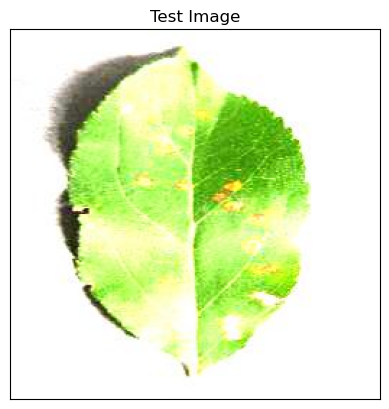

In [5]:
#Test Image Visualization
import cv2
image_path = 'test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step


In [7]:
print(predictions)

[[2.07142348e-05 9.56164214e-08 8.09474587e-01 7.94485459e-06
  7.80551520e-04 1.68680772e-02 5.11486803e-07 7.52044798e-07
  1.42469592e-08 1.49656705e-06 8.84717679e-07 9.18076239e-06
  3.96342500e-07 5.63930804e-08 2.65412764e-05 5.21793868e-03
  1.21512285e-05 1.30421840e-05 2.29668894e-05 1.88433949e-03
  5.38420464e-09 5.42651151e-07 4.60579668e-06 6.45143155e-06
  3.51307267e-06 6.99650673e-06 3.87372097e-07 1.13314150e-06
  1.09714034e-04 2.06848927e-04 3.17733875e-03 1.56144768e-06
  8.48938271e-06 7.53934899e-07 5.83632791e-05 1.62065983e-01
  2.88512388e-06 2.19046592e-06]]


In [8]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


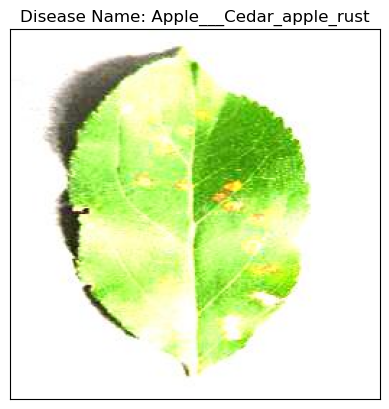

In [9]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()